In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LinearRegression

## Paso 1: Planteamiento del problema

Analizar las características demográficas y clínicas del conjunto de datos para descubrir insights que relacionen variables como Glucosa, BMI y Edad con la variable objetivo Outcome, y así preparar los datos para construir un modelo de Machine Learning que prediga la probabilidad de diabetes.

## Paso 2: Exploración y limpieza de datos

In [2]:
df = pd.read_csv("../data/raw/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Paso 3: Análisis Descriptivo

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Paso 4: Limpieza de Datos

### Limpieza de datos: Eliminar duplicados

In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

### Limpieza de datos: Eliminar información irrelevante

In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Paso 5: Análisis de Variables

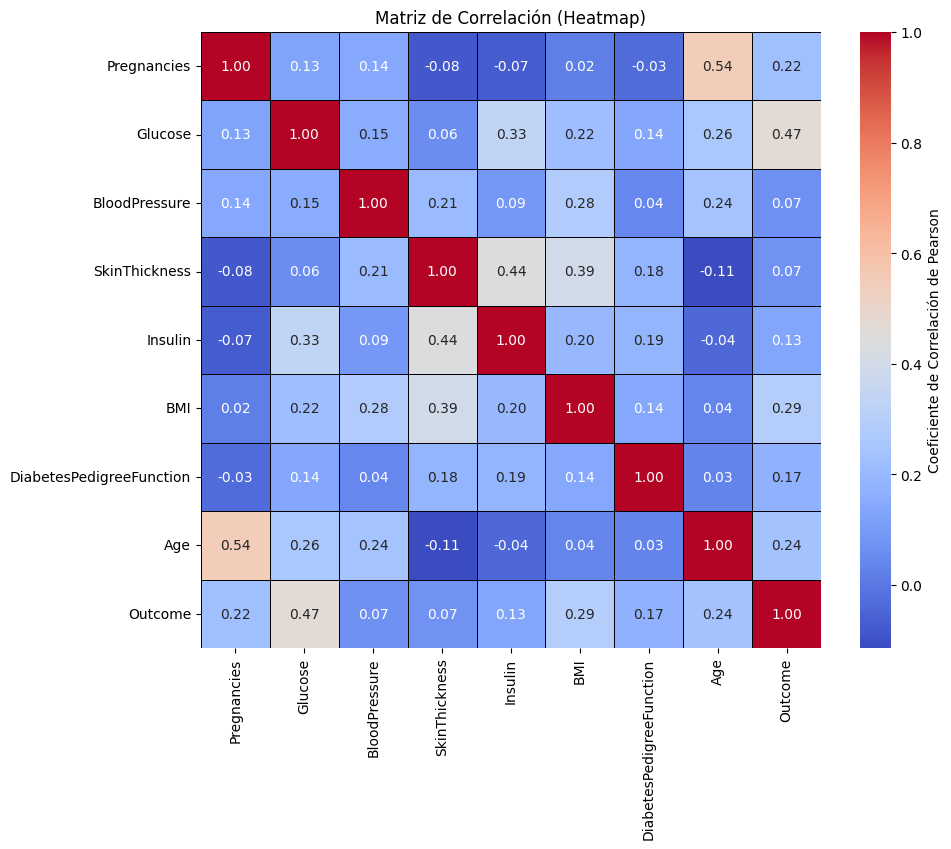

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            linewidths=0.5,
            linecolor='black',
            cbar_kws={'label': 'Coeficiente de Correlación de Pearson'})

plt.title('Matriz de Correlación (Heatmap)')
plt.show()

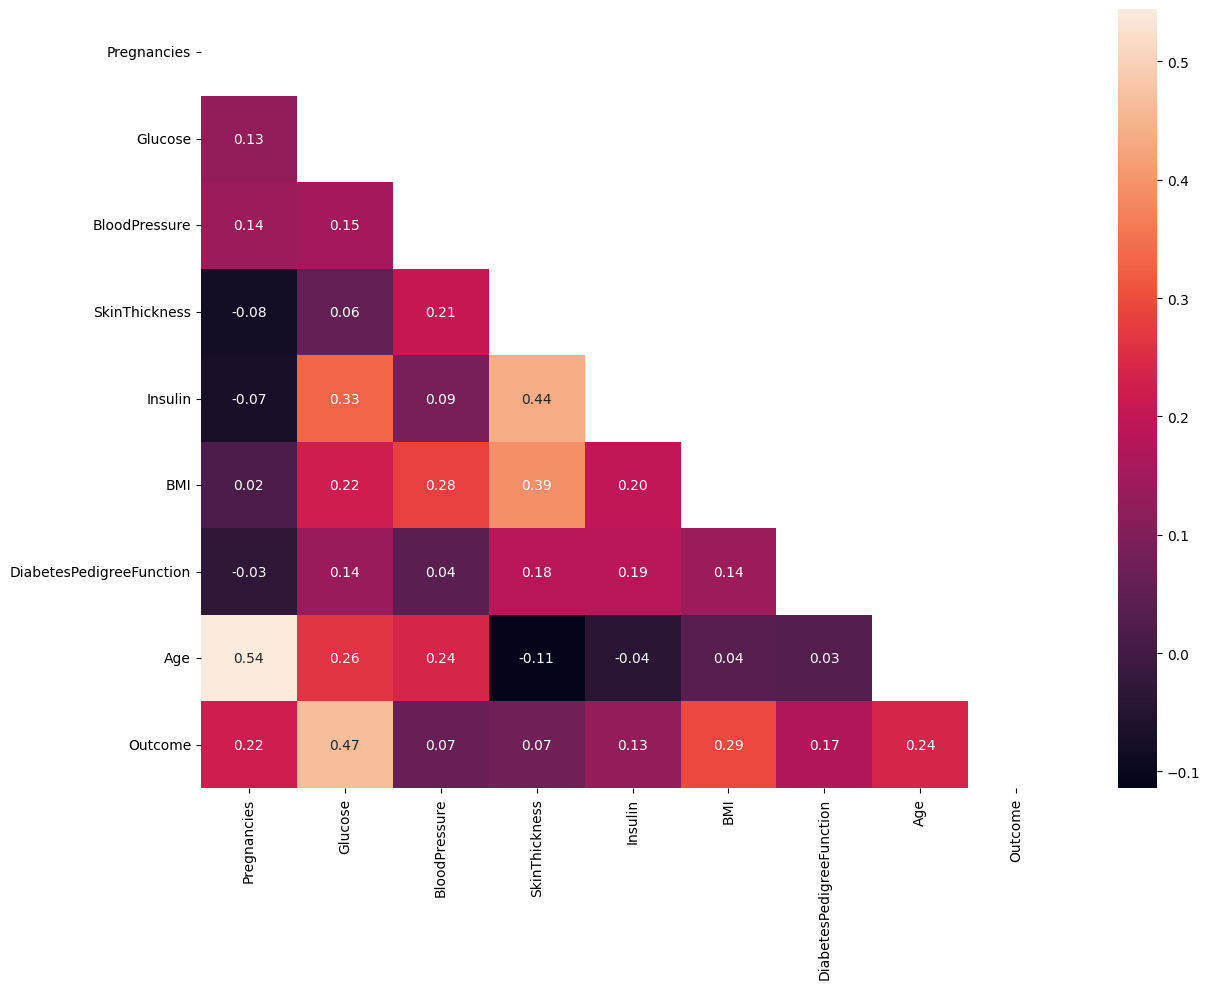

In [29]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

fig, axis = plt.subplots(figsize=(13,10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

## Paso 6: Ingeniería de características

### Análisis de outliers

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


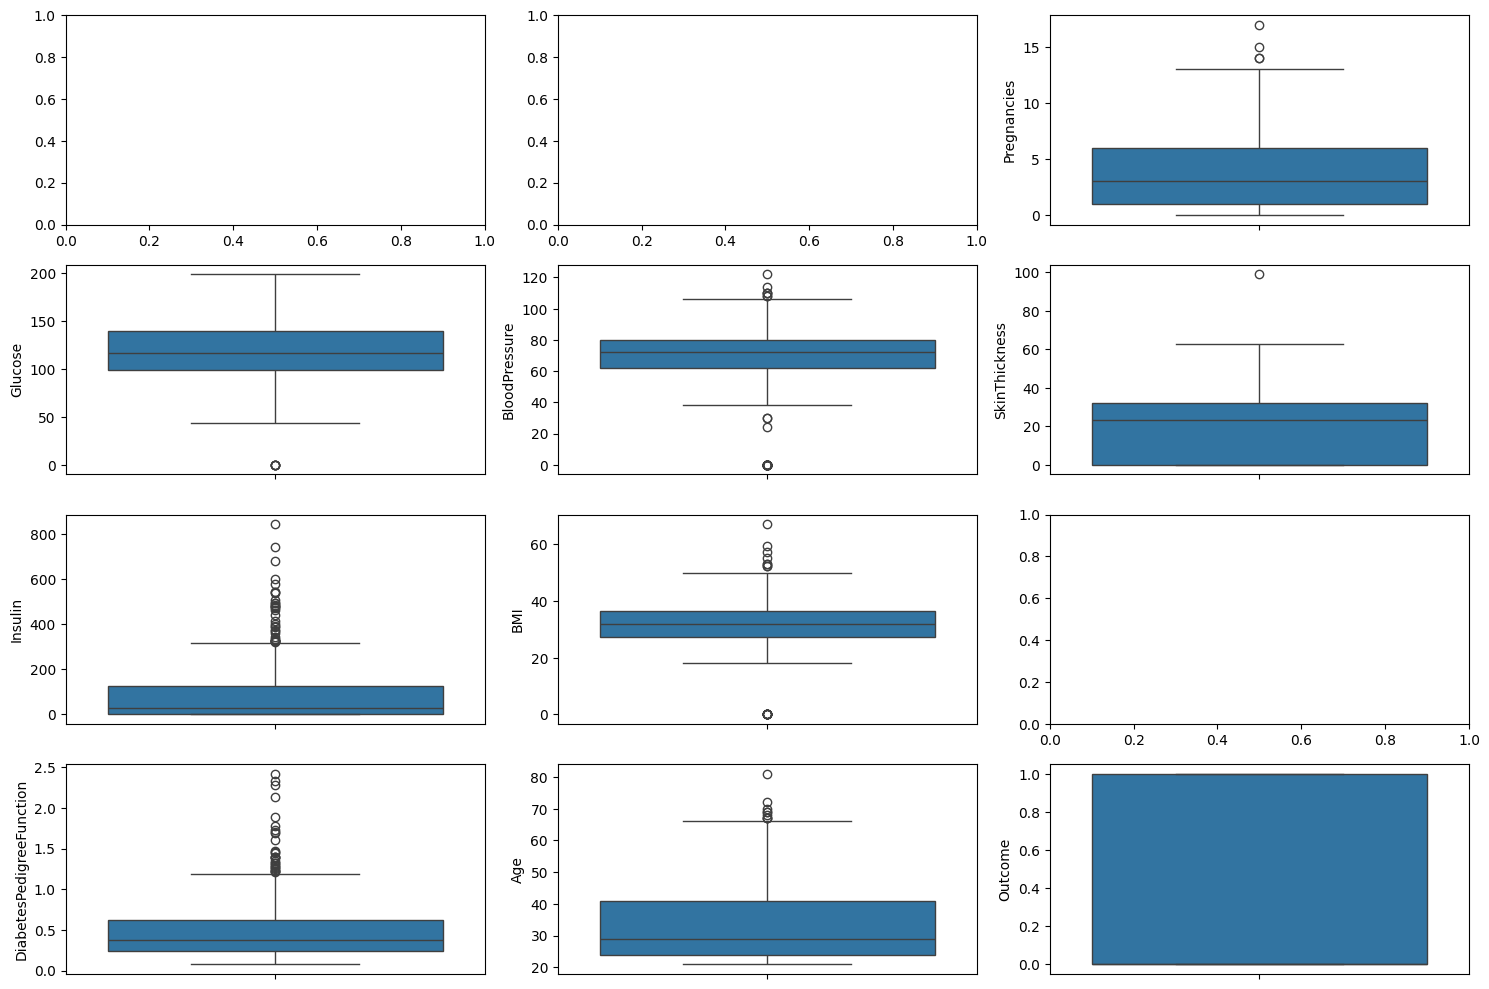

In [11]:
fig, axis = plt.subplots(4, 3, figsize=(15, 10))

sns.boxplot(ax=axis[0, 2], data=df, y='Pregnancies')
sns.boxplot(ax=axis[1, 0], data=df, y='Glucose')
sns.boxplot(ax=axis[1, 1], data=df, y='BloodPressure')
sns.boxplot(ax=axis[1, 2], data=df, y='SkinThickness')
sns.boxplot(ax=axis[2, 0], data=df, y='Insulin')
sns.boxplot(ax=axis[2, 1], data=df, y='BMI')
sns.boxplot(ax=axis[3, 0], data=df, y='DiabetesPedigreeFunction')
sns.boxplot(ax=axis[3, 1], data=df, y='Age')
sns.boxplot(ax=axis[3, 2], data=df, y='Outcome')

plt.tight_layout()
plt.show()

### Análisis de valores faltantes

In [12]:
df.shape[1]

9

In [13]:
df.isnull().sum() / df.shape[0]

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [14]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df[df['Outcome'].isnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [20]:
df["DiabetesPedigreeFunction"].median()

np.float64(0.3725)

### Inferencia de nuevas características

## Paso 7: Split 

In [21]:
df.shape

(768, 9)

In [22]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)


X_train.shape

(614, 8)

In [23]:
X_test.shape

(154, 8)

In [24]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
540,8,100,74,40,215,39.4,0.661,43
307,0,137,68,14,148,24.8,0.143,21
745,12,100,84,33,105,30.0,0.488,46
691,13,158,114,0,0,42.3,0.257,44
564,0,91,80,0,0,32.4,0.601,27
...,...,...,...,...,...,...,...,...
346,1,139,46,19,83,28.7,0.654,22
353,1,90,62,12,43,27.2,0.580,24
627,0,132,78,0,0,32.4,0.393,21
708,9,164,78,0,0,32.8,0.148,45


## Paso 8: Encoding & Scaling 

### Normalización o Escalado Mínimo-Máximo

In [26]:

norm_scaler = StandardScaler()  # Instancia de: from sklearn.preprocessing import StandardScaler

num_variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
norm_features = norm_scaler.fit_transform(df[num_variables])

df_norm = pd.DataFrame(norm_features,
                       index=df.index,
                       columns=num_variables)
df_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
